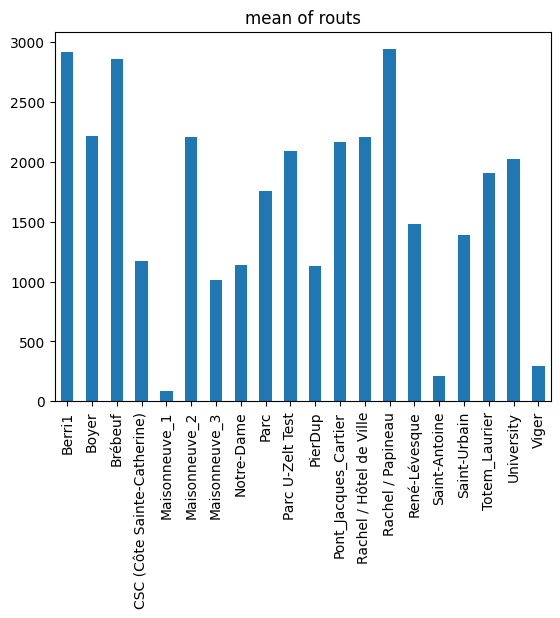

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('/home/erfan/Downloads/archive(2)/comptagesvelo2015.csv')


df_of_routs = df[['Berri1', 'Boyer', 'Brébeuf',
       'CSC (Côte Sainte-Catherine)', 'Maisonneuve_1', 'Maisonneuve_2',
       'Maisonneuve_3', 'Notre-Dame', 'Parc', 'Parc U-Zelt Test', 'PierDup',
       'Pont_Jacques_Cartier', 'Rachel / Hôtel de Ville', 'Rachel / Papineau',
       'René-Lévesque', 'Saint-Antoine',
       'Saint-Urbain', 'Totem_Laurier', 'University', 'Viger']]
df_of_routs.mean().plot(kind='bar').set_title('mean of routs');plt.show()


In [48]:
def create_feature(df, col_name, degree):
    x = df[col_name]
    x = (x - np.mean(x)) / np.std(x)
    X = np.zeros((x.shape[0], degree+1))
    for i in range(0, degree + 1):
        X[:, i] = x ** i

    x_arr = np.array(X)
    x_df = pd.DataFrame(x_arr)
    x_df = x_df.iloc[:, 1:degree+1]
    x_arr = np.array(x_df)
    return x_arr

In [49]:
X = create_feature(df, 'Berri1', 7)
X

array([[-1.25726417,  1.58071319, -1.98737406, ..., -3.1414684 ,
         3.94965566, -4.96576055],
       [-1.24978412,  1.56196034, -1.95211322, ..., -3.04912343,
         3.81074603, -4.76260986],
       [-1.2480241 ,  1.55756416, -1.94387762, ..., -3.02771412,
         3.7786602 , -4.71585902],
       ...,
       [-0.48285863,  0.23315245, -0.11257967, ..., -0.02624823,
         0.01267418, -0.00611984],
       [-0.85202127,  0.72594024, -0.61851653, ..., -0.44900604,
         0.3825627 , -0.32595155],
       [-0.88106148,  0.77626933, -0.683941  , ..., -0.53092242,
         0.46777529, -0.41213879]])

In [50]:
# y = df['Berri1']
# x_arr = np.array(X)
# y_arr = np.array(y)
# x_df = pd.DataFrame(x_arr)
# x_df = x_df.iloc[:, 1:8]
# x_arr = np.array(x_df)
# x_arr.shape

In [198]:
def update(w, y, degree, col_name, lr=0.00001):
    Xx = create_feature(df, col_name, degree)
    x_arr = np.array(Xx)
    x_df = pd.DataFrame(x_arr)
    x_df = x_df.iloc[:, :degree+1]
    x_arr = np.array(x_df)
    y_pred = np.dot(x_arr, w)
    y_pred = np.ones(y.shape[0], y.shape[1])
    err = y - y_pred
    for i in range(degree):
        y = (y - np.min(y)) / (np.max(y) - np.min(y))
        y_pred = (y_pred - np.min(y_pred)) / (np.max(y_pred) - np.min(y_pred))
        err = y - y_pred
        err = (err - np.min(err)) / (np.max(err) - np.min(err))
        
        y_pred = np.dot(x_arr, w)
        x_df2 = x_df.iloc[:, i:i+1]
        x_arr2 = np.array(x_df2)

        gradient = (-2 / len(y)) * np.dot(err, np.power(x_arr2, i))
        

        w -= lr * gradient
    return y_pred, err, gradient, w

In [199]:
def poly_reg(df, col_name, degree, epoches=1000, regularization=0.05):
    y = df[col_name]
    y = (y - np.min(y)) / (np.max(y) - np.min(y))

    w = np.zeros(degree)

    for epoch in range(epoches):
        y_pred, err, gradient, w = update(w, y, degree, col_name)

        if np.any(np.isnan(gradient)) or np.any(np.isinf(gradient)):
            print(epoch)
            print(err)
            break

        L1_cost = np.mean(np.abs(err))
        L2_cost = np.mean(err ** 2) 
        
        if epoch % 100 == 0:
            print(f"Epoch {epoch}, L1 Cost: {L1_cost:.4f}, L2 Cost: {L2_cost:.4f}")
            print('\n',gradient)

    # print(x.shape)
    return w

In [200]:
# predict for the Berri1 lane:
degree = 7

x = create_feature(df, 'Berri1', degree)
w = poly_reg(df, 'Berri1', degree)

y_pred = np.dot(x, w)

IndexError: tuple index out of range

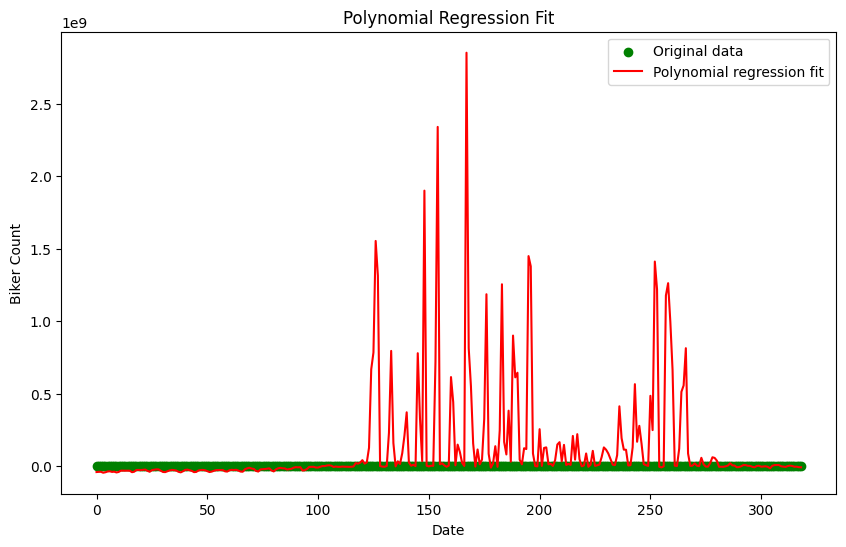

In [194]:
plt.figure(figsize=(10, 6))
plt.scatter(df.index, df['Berri1'], color='green', label='Original data')
plt.plot(df.index, y_pred, color='red', label='Polynomial regression fit')
plt.title('Polynomial Regression Fit')
plt.xlabel('Date')
plt.ylabel('Biker Count')
plt.legend()
plt.show()